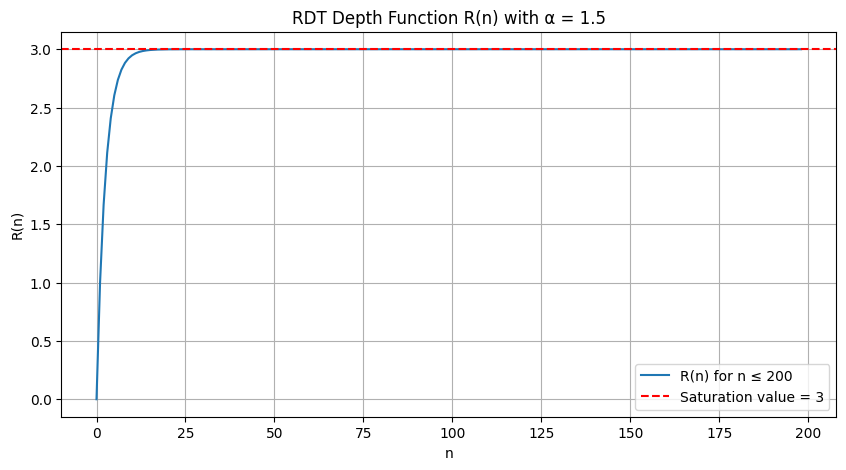

Saturation value (theoretical): 3.0
R(23) = 2.999599028453571   (approx saturation point)


In [2]:
# ===============================================================
# Recursive-Depth Integration Notebook
# Steven Reid (2025)
# Supplementary Materials for Zenodo Preprint
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

# -----------------------------
# 1. RDT DEPTH FUNCTION
# -----------------------------
def compute_R_table(n_max, alpha=1.5):
    """
    Compute RDT depth values R(0..n_max).
    R(0) = infinity (we represent with np.inf)
    """
    R = np.zeros(n_max+1)
    R[0] = np.inf
    R[1] = 0.0

    for n in range(2, n_max+1):
        best = np.inf
        for k in range(1, n):
            val = 1 + (R[k] + R[n-k]) / alpha
            if val < best:
                best = val
        R[n] = best
    return R

# Compute R up to 2000
alpha = 1.5
R = compute_R_table(2000, alpha)

# -----------------------------
# 2. PLOT: SATURATION OF R(n)
# -----------------------------

plt.figure(figsize=(10,5))
plt.plot(R[1:200], label="R(n) for n ≤ 200")
plt.axhline(alpha/(alpha-1), color="red", linestyle="--", label="Saturation value = 3")
plt.title("RDT Depth Function R(n) with α = 1.5")
plt.xlabel("n")
plt.ylabel("R(n)")
plt.legend()
plt.grid(True)
plt.show()

print("Saturation value (theoretical):", alpha/(alpha-1))
print("R(23) =", R[23], "  (approx saturation point)")


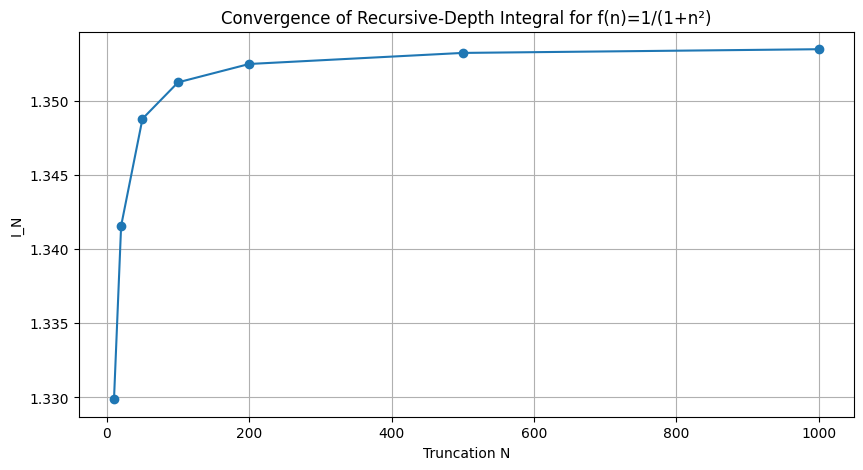

N=  10,  I_N = 1.3298769739
N=  20,  I_N = 1.3415872619
N=  50,  I_N = 1.3488215431
N= 100,  I_N = 1.3512837700
N= 200,  I_N = 1.3525243597
N= 500,  I_N = 1.3532717299
N=1000,  I_N = 1.3535213547


In [3]:
# -----------------------------
# 3. RECURSIVE-DEPTH INTEGRAL
# -----------------------------

def recursive_depth_integral(f, N, R, rho=0.5):
    """
    Compute I_N = sum_{n=-N..N} f(n) * rho^{R(|n|)}
    """
    total = 0.0
    for n in range(-N, N+1):
        if n == 0:
            continue
        total += f(n) * (rho ** R[abs(n)])
    return total

# Example function
f1 = lambda n: 1/(1+n*n)

# Compute truncated integrals for increasing N
Ns = [10, 20, 50, 100, 200, 500, 1000]
values = [recursive_depth_integral(f1, N, R, rho=0.5) for N in Ns]

# -----------------------------
# 4. PLOT: CONVERGENCE OF I_N
# -----------------------------

plt.figure(figsize=(10,5))
plt.plot(Ns, values, marker='o')
plt.title("Convergence of Recursive-Depth Integral for f(n)=1/(1+n²)")
plt.xlabel("Truncation N")
plt.ylabel("I_N")
plt.grid(True)
plt.show()

for N, val in zip(Ns, values):
    print(f"N={N:4d},  I_N = {val:.10f}")


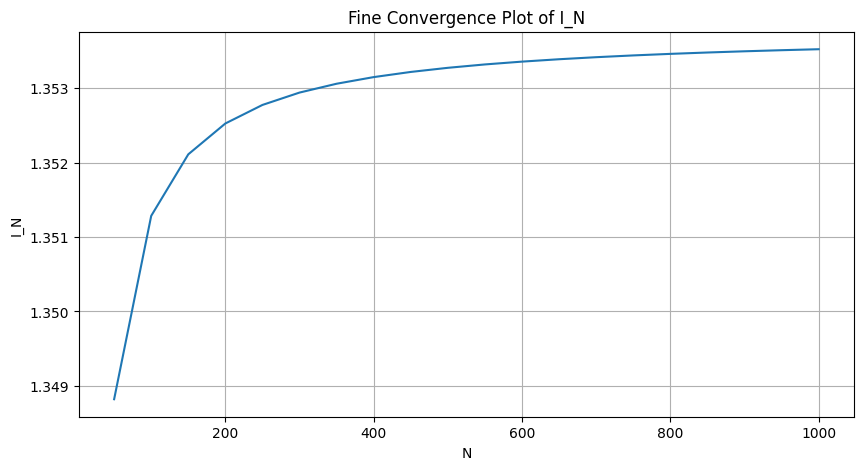

I_1000 = 1.3535213546505576


In [4]:
# -----------------------------
# 5. TAIL ERROR ANALYSIS
# -----------------------------

# A dense sampling for finer convergence visualization
Ns_dense = np.arange(50, 1001, 50)
vals_dense = [recursive_depth_integral(f1, N, R, rho=0.5) for N in Ns_dense]

plt.figure(figsize=(10,5))
plt.plot(Ns_dense, vals_dense)
plt.title("Fine Convergence Plot of I_N")
plt.xlabel("N")
plt.ylabel("I_N")
plt.grid(True)
plt.show()

print("I_1000 =", vals_dense[-1])


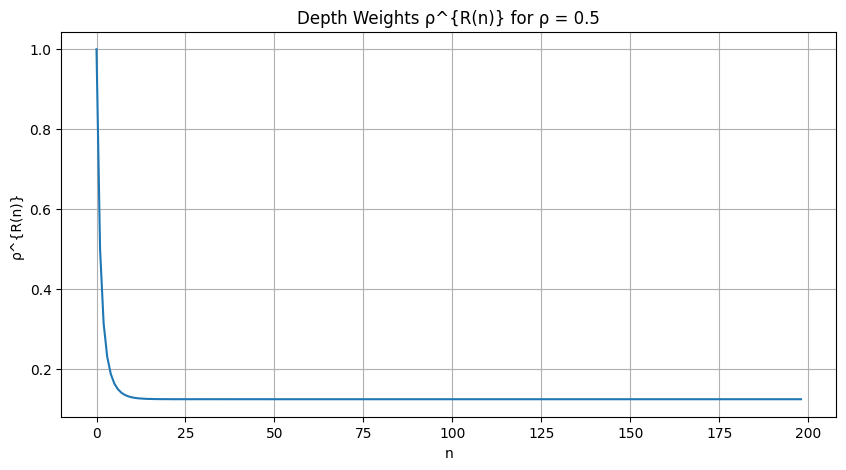

ρ^{R*} = 0.125


In [5]:
# -----------------------------
# 6. PLOT OF WEIGHTS rho^{R(n)}
# -----------------------------

rho = 0.5
weights = rho**R[1:200]

plt.figure(figsize=(10,5))
plt.plot(weights)
plt.title("Depth Weights ρ^{R(n)} for ρ = 0.5")
plt.xlabel("n")
plt.ylabel("ρ^{R(n)}")
plt.grid(True)
plt.show()

print("ρ^{R*} =", rho**(alpha/(alpha-1)))


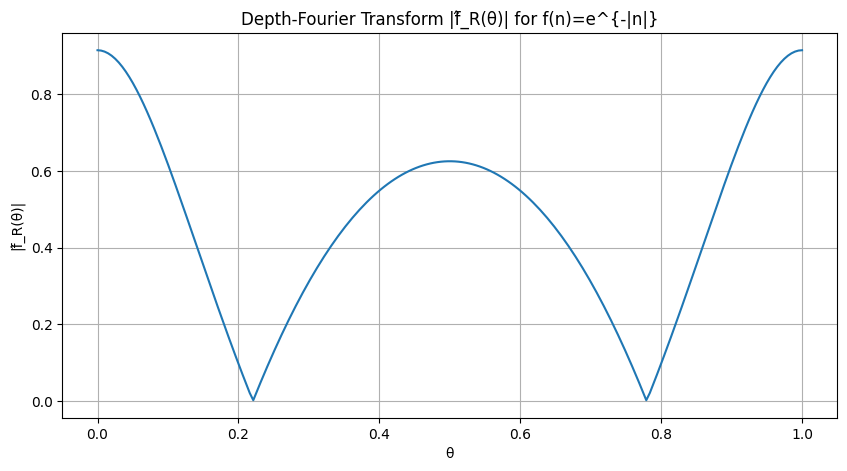

In [6]:
# -----------------------------
# 7. DEPTH-FOURIER TRANSFORM DEMO
# -----------------------------

def depth_fourier_transform(f, theta_points, R, rho=0.5, N=1000):
    """
    Compute f̂_R(θ) = sum f(n) ρ^{R(|n|)} e^{-2π i n θ}
    """
    thetas = np.linspace(0, 1, theta_points)
    output = []

    for theta in thetas:
        s = 0
        for n in range(-N, N+1):
            if n == 0:
                continue
            w = rho**R[abs(n)]
            s += f(n) * w * np.exp(-2j * np.pi * n * theta)
        output.append(s)
    return thetas, np.array(output)

# Compute transform for f(n)=e^{-|n|}
f2 = lambda n: np.exp(-abs(n))

thetas, Fvals = depth_fourier_transform(f2, 200, R, N=300)

# -----------------------------
# 8. PLOT: MAGNITUDE OF DEPTH FOURIER TRANSFORM
# -----------------------------

plt.figure(figsize=(10,5))
plt.plot(thetas, np.abs(Fvals))
plt.title("Depth-Fourier Transform |f̂_R(θ)| for f(n)=e^{-|n|}")
plt.xlabel("θ")
plt.ylabel("|f̂_R(θ)|")
plt.grid(True)
plt.show()


In [7]:
# -----------------------------
# 9. COMPARISON WITH UNWEIGHTED SUM
# -----------------------------

# Direct unweighted infinite sum approximate
N_large = 5000
unweighted = sum(1/(1+n*n) for n in range(-N_large, N_large+1))

print("Unweighted ≈", unweighted)
print("Weighted I_1000 ≈", values[-1])
print("Ratio I / Unweighted ≈", values[-1] / unweighted)


Unweighted ≈ 3.1529481349398276
Weighted I_1000 ≈ 1.3535213546505576
Ratio I / Unweighted ≈ 0.42928754192031415
